# Effect of spectral resolution on line sensitivity 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
linewidth = 0.005
lam0, lam1 = 1, 3
lam = np.arange(lam0, lam1+linewidth, linewidth/10)
N = lam.size

In [60]:
noise_level = 0.001
line_strength = 0.1
line_center = 2

continuum = np.ones(N)
noise = np.random.randn(N)*noise_level

line_func = lambda x: line_strength*np.exp(-(x-line_center)**2/(2*linewidth**2))

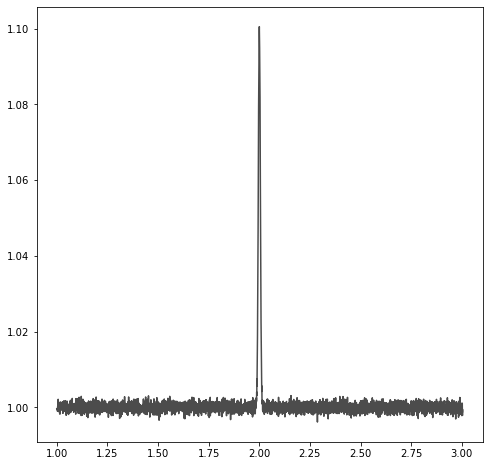

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(lam, continuum + noise + line_func(lam), label='true spectrum',
        marker='', linestyle='-', color='black', alpha=0.7)
# ax.plot(lam, continuum + line_func(lam), label='true spectrum',
#         marker='', linestyle='-', color='firebrick', linewidth=2)

In [104]:
bin_width = 0.07
bins = np.arange(lam0, lam1 + bin_width, bin_width)
n_bins = bins.size - 1
print(bins[0], bins[-1])
binned = np.digitize(lam, bins)

full_spectrum = noise + continuum + line_func(lam)
binned_data = np.array([np.mean(full_spectrum[binned==b]) for b in np.unique(binned)
                        if (b >= 0) and (b <= n_bins)])
bin_centers = bins[:-1] + bin_width/2

1.0 3.030000000000002


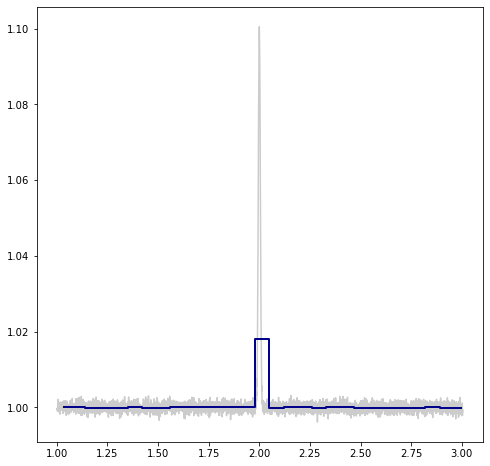

In [105]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(lam, continuum + noise + line_func(lam), label='true spectrum',
        marker='', linestyle='-', color='black', alpha=0.2)
ax.step(bin_centers, binned_data, label='binned spectrum', where='mid',
        linestyle='-', color='darkblue', linewidth=2)